In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
%cd 'drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары'

/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары


In [ ]:
x_df = pd.read_csv('2_x.csv', header=None, names=['x1', 'x2', 'x3', 'x4', 'x5'])
y_df = pd.read_csv('2_y.csv', header=None, names=['y'])

In [ ]:
x_df.head(5)

,x1,x2,x3,x4,x5
0,-0.500822,-0.326526,-0.277360,-0.443141,0.826488
1,-0.783084,-0.198363,0.762444,-0.222940,0.469849
2,-1.168173,0.411563,0.983402,-0.899597,-1.594121
3,0.793839,0.161262,-1.075209,-1.351574,0.132724
4,-0.880914,-0.635828,-1.055353,0.206016,1.210570


In [ ]:
y_df.head(5)

,y
0,-46.744921
1,23.918809
2,-86.382982
3,-75.265223
4,-72.452990


In [ ]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      429 non-null    float64
 1   x2      429 non-null    float64
 2   x3      429 non-null    float64
 3   x4      429 non-null    float64
 4   x5      429 non-null    float64
dtypes: float64(5)
memory usage: 16.9 KB


In [ ]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       429 non-null    float64
dtypes: float64(1)
memory usage: 3.5 KB


In [ ]:
x_df.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
dtype: int64

In [ ]:
y_df.isna().sum()

y    0
dtype: int64

In [ ]:
x_df.describe()

,x1,x2,x3,x4,x5
count,429.000000,429.000000,429.000000,429.000000,429.000000
mean,0.029584,-0.091939,0.016475,-0.098890,-0.064772
std,1.060964,1.012944,1.015593,0.996983,1.010574
min,-3.638320,-3.962263,-3.185853,-3.042186,-3.119675
25%,-0.783084,-0.732207,-0.677815,-0.782365,-0.757573
50%,-0.010157,-0.136298,0.012458,-0.069914,-0.064125
75%,0.793839,0.577899,0.730554,0.603604,0.526089
max,3.146039,2.827457,4.151262,2.579946,2.837488


In [ ]:
y_df.describe()

,y
count,429.000000
mean,-7.436140
std,119.167716
min,-364.003065
25%,-87.080224
50%,-9.922320
75%,69.181692
max,361.993000


In [ ]:
df_differences = pd.DataFrame(columns=['Тип регресии', 'Признак(и)', 'Тип выборки', 'The R-squared value', 'RMSE', 'MAE'])

## Парная лин регрессия между всеми признаками

x1
0.24802713259309217
The R-squared value x1: 0.24802713259309217
RMSE x1: 105.85866840420665
MAE x1: 83.97557167943245

x2
0.15625004514764562
The R-squared value x2: 0.15625004514764562
RMSE x2: 112.13268532336987
MAE x2: 89.37267681692464

x3
0.358515149913756
The R-squared value x3: 0.358515149913756
RMSE x3: 97.77291049268666
MAE x3: 78.46938919559446

x4
0.028603441967681498
The R-squared value x4: 0.028603441967681498
RMSE x4: 120.31606550999881
MAE x4: 97.54214006577189

x5
0.20802977447948412
The R-squared value x5: 0.20802977447948412
RMSE x5: 108.63750140377289
MAE x5: 89.32332616717255



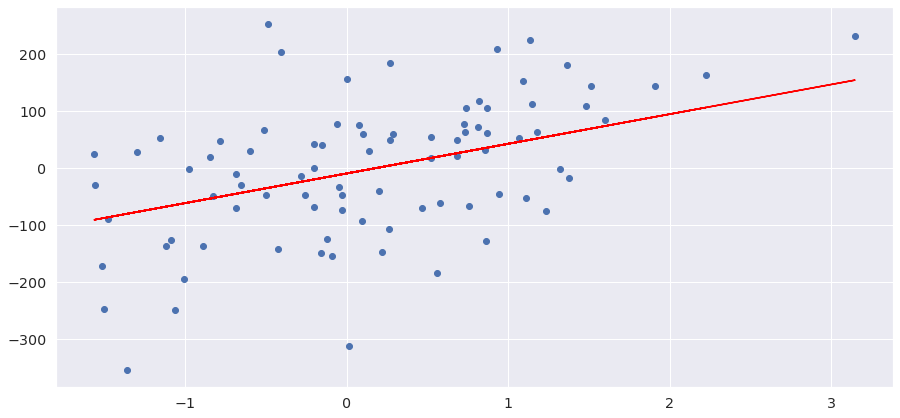

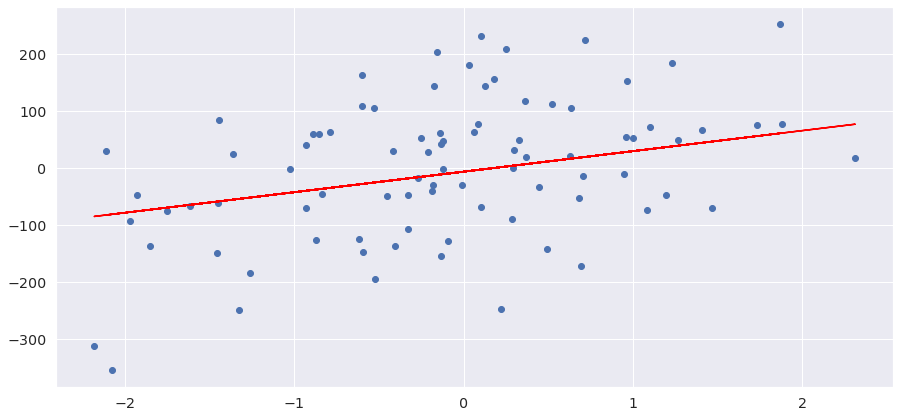

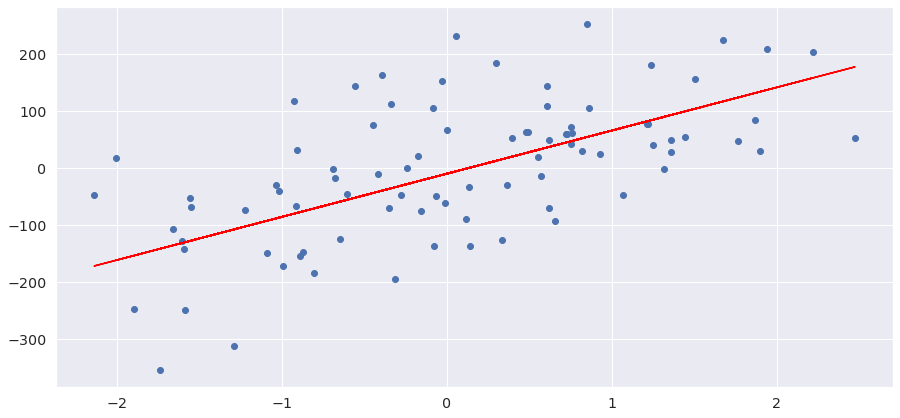

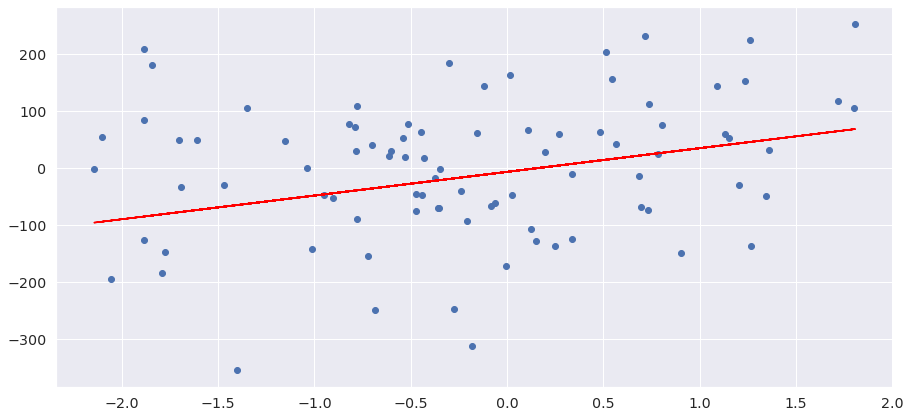

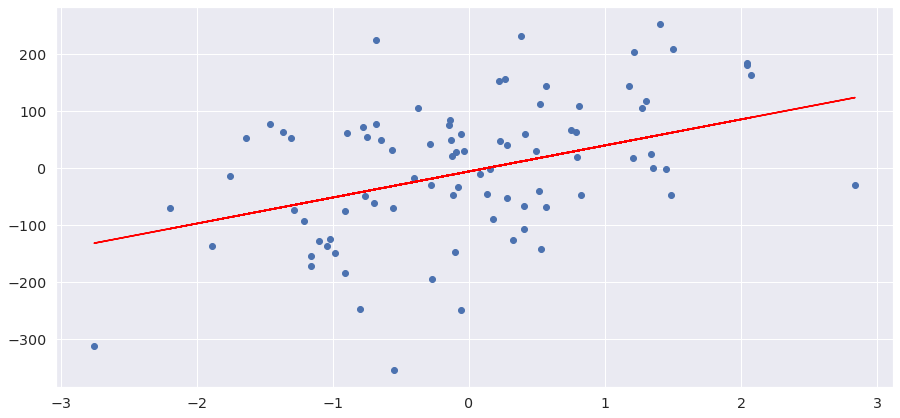

In [ ]:
i = 0
for x in x_df:
  print(x)
  X_train, X_test, y_train, y_test = train_test_split(x_df[x].to_numpy().reshape(-1,1), y_df, train_size=0.8, random_state=42)
  model = LinearRegression().fit(X_train, y_train)

  # Точность для тестируемых данных
  print(model.score(X_test,y_test))
  print(f'The R-squared value {x}: {r2_score(y_test, model.predict(X_test))}') 
  print(f'RMSE {x}: {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')
  print(f'MAE {x}: {mean_absolute_error(y_test, model.predict(X_test))}\n')
  df_differences.loc[i] = [f'Парная регрессия', x, 'Train',r2_score(y_train, model.predict(X_train)), 
                           np.sqrt(mean_squared_error(y_train, model.predict(X_train))),mean_absolute_error(y_train, model.predict(X_train))
                           ]
  i += 1
  df_differences.loc[i] = [f'Парная регрессия', x, 'Test', r2_score(y_test, model.predict(X_test)), 
                           np.sqrt(mean_squared_error(y_test, model.predict(X_test))),mean_absolute_error(y_test, model.predict(X_test))
                           ]
  i += 1
  sns.set(font_scale=1.3)
  plt.figure(figsize=(15, 7))
  plt.scatter(X_test[:,0], y_test.values[:,0])
  plt.plot(X_test[:,0], model.predict(X_test)[:,0], color='red')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8, random_state=42)
model = LinearRegression().fit(X_train, y_train)

# Точность для тестируемых данных
print(f'The R-squared value: {r2_score(y_test, model.predict(X_test))}') 
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, model.predict(X_test)))}')
print(f'MAE: {mean_absolute_error(y_test, model.predict(X_test))}')
df_differences.loc[i] = [f'Множественная регрессия', 'x1,x2,x3,x4,x5', 'Train', r2_score(y_train, model.predict(X_train)), 
                           np.sqrt(mean_squared_error(y_train, model.predict(X_train))), mean_absolute_error(y_train, model.predict(X_train))
                          ]
i += 1
df_differences.loc[i] = [f'Множественная регрессия', 'x1,x2,x3,x4,x5', 'Test', r2_score(y_test, model.predict(X_test)), 
                           np.sqrt(mean_squared_error(y_test, model.predict(X_test))), mean_absolute_error(y_test, model.predict(X_test))
                           ]

The R-squared value: 0.9954247721903713
RMSE: 8.257179068916102
MAE: 6.758020512428446


In [ ]:
model.coef_

array([[52.38486332, 38.15383323, 71.741447  , 39.68205084, 47.66501191]])

Доп задания:
1. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

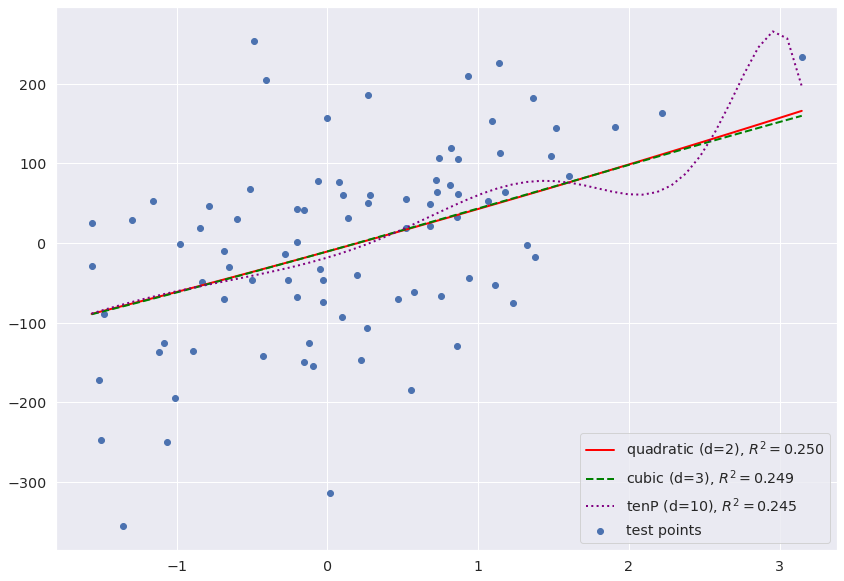

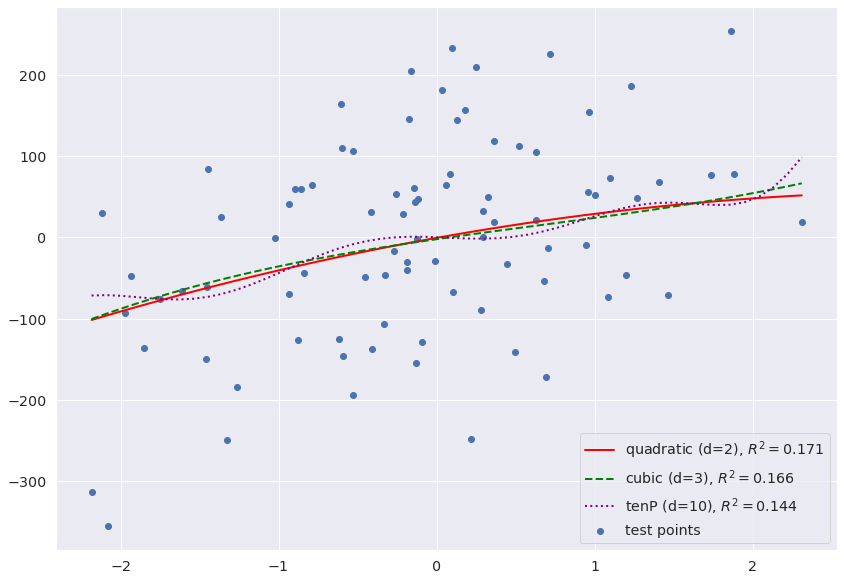

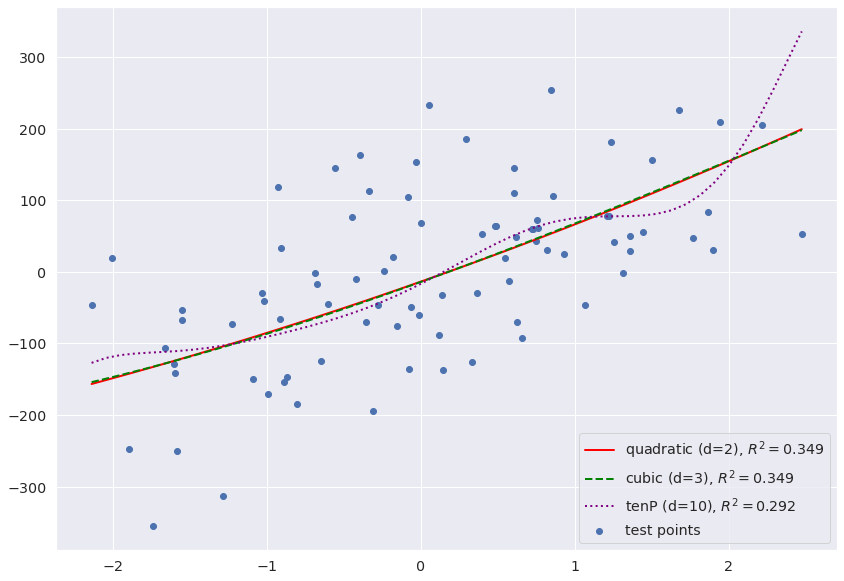

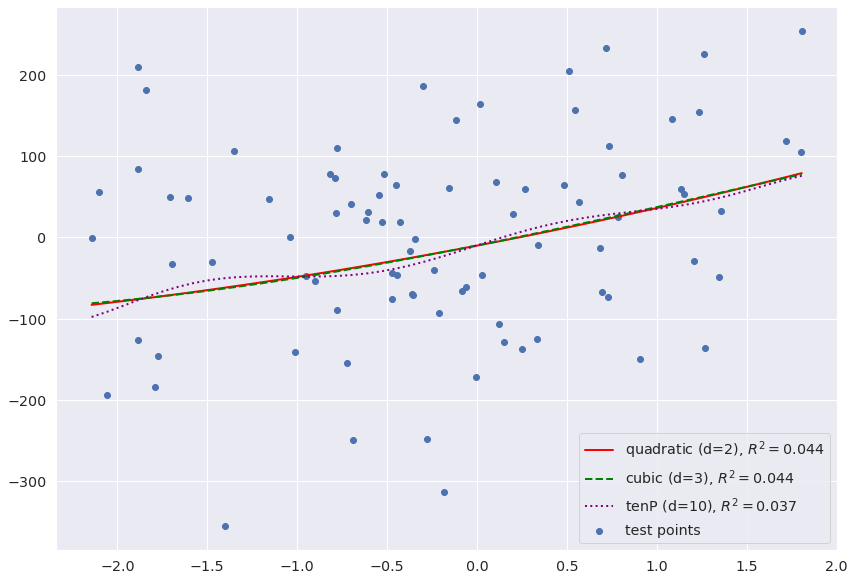

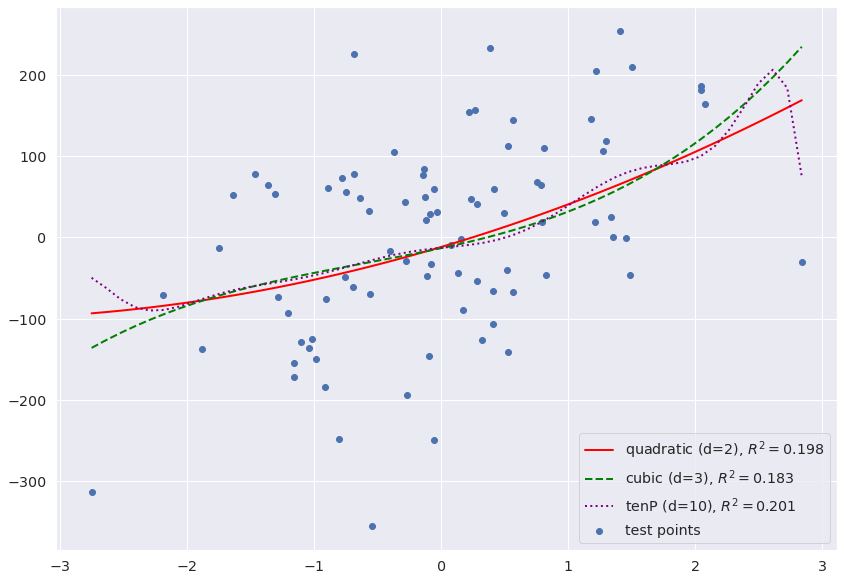

In [ ]:
for x in x_df:
  
  X_train, X_test, y_train, y_test = train_test_split(x_df[x].to_numpy().reshape(-1,1), y_df, train_size=0.8, random_state=42)
  regr = LinearRegression()

  quadratic = PolynomialFeatures(degree=2)
  cubic = PolynomialFeatures(degree=3)
  tenP = PolynomialFeatures(degree=10)

  X_quad = quadratic.fit_transform(X_train)
  X_cubic = cubic.fit_transform(X_train)
  X_10 = tenP.fit_transform(X_train)

  #2
  regr2 = regr.fit(X_quad, y_train)
  y_quad_fit = regr2.predict(quadratic.fit_transform(X_test))
  quadratic_r2 = r2_score(y_test, y_quad_fit)

  i += 1
  df_differences.loc[i] = [f'Парная полиномиальная регрессия второго порядка', x, 'Train', r2_score(y_train, regr2.predict(quadratic.fit_transform(X_train))), 
                           np.sqrt(mean_squared_error(y_train, regr2.predict(quadratic.fit_transform(X_train)))), 
                           mean_absolute_error(y_train, regr2.predict(quadratic.fit_transform(X_train)))
                          ]
  i += 1
  df_differences.loc[i] = [f'Парная полиномиальная регрессия второго порядка', x, 'Test', r2_score(y_test, y_quad_fit), 
                           np.sqrt(mean_squared_error(y_test, y_quad_fit)), mean_absolute_error(y_test, y_quad_fit)
                           ]

  regr = LinearRegression()
  #3
  regr3 = regr.fit(X_cubic, y_train)
  y_cubic_fit = regr3.predict(cubic.fit_transform(X_test))
  cubic_r2 = r2_score(y_test, y_cubic_fit)

  i += 1
  df_differences.loc[i] = [f'Парная полиномиальная регрессия третьего порядка', x, 'Train', r2_score(y_train, regr3.predict(cubic.fit_transform(X_train))), 
                           np.sqrt(mean_squared_error(y_train, regr3.predict(cubic.fit_transform(X_train)))), 
                           mean_absolute_error(y_train, regr3.predict(cubic.fit_transform(X_train)))
                          ]
  i += 1
  df_differences.loc[i] = [f'Парная полиномиальная регрессия третьего порядка', x, 'Test', r2_score(y_test, y_cubic_fit), 
                           np.sqrt(mean_squared_error(y_test, y_cubic_fit)), mean_absolute_error(y_test, y_cubic_fit)
                           ]

  regr = LinearRegression()
  #10
  regr10 = regr.fit(X_10, y_train)
  y_tenP_fit = regr10.predict(tenP.fit_transform(X_test))
  tenP_r2 = r2_score(y_test, y_tenP_fit)

  i += 1
  df_differences.loc[i] = [f'Парная полиномиальная регрессия десятого порядка', x, 'Train', r2_score(y_train, regr10.predict(tenP.fit_transform(X_train))), 
                           np.sqrt(mean_squared_error(y_train, regr10.predict(tenP.fit_transform(X_train)))), 
                           mean_absolute_error(y_train, regr10.predict(tenP.fit_transform(X_train)))
                          ]
  i += 1
  df_differences.loc[i] = [f'Парная полиномиальная регрессия десятого порядка', x, 'Test', r2_score(y_test, y_tenP_fit), 
                           np.sqrt(mean_squared_error(y_test, y_tenP_fit)), mean_absolute_error(y_test, y_tenP_fit)
                           ]

  # Plots
  #2
  x0 = np.linspace(min(X_test), max(X_test))
  plt.figure(figsize=(14, 10))
  plt.scatter(X_test, y_test, label='test points')
  plt.plot(x0, regr2.predict(quadratic.fit_transform(x0)), 
          label='quadratic (d=2), $R^2={:.3f}$'.format(quadratic_r2),
          color='red', 
          lw=2,
          linestyle='-')
  #3
  plt.plot(x0, regr3.predict(cubic.fit_transform(x0)), 
          label='cubic (d=3), $R^2={:.3f}$'.format(cubic_r2),
          color='green', 
          lw=2,
          linestyle='--')
  #10
  plt.plot(x0, regr10.predict(tenP.fit_transform(x0)), 
          label='tenP (d=10), $R^2={:.3f}$'.format(tenP_r2),
          color='purple', 
          lw=2,
          linestyle=':')

  plt.legend(loc='lower right')


2. Постройте сводную таблицу показателей точности всех построенных моделей по тестовой и обучающей выборке. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [ ]:
df_differences

In [ ]:
df1 = df_differences.loc[12:, :]
df1

,Тип регресии,Признак(и),Тип выборки,The R-squared value,RMSE,MAE
12,Парная полиномиальная регрессия второго порядка,x1,Train,0.228771,103.789959,82.629036
13,Парная полиномиальная регрессия второго порядка,x1,Test,0.249806,105.733416,83.787736
14,Парная полиномиальная регрессия третьего порядка,x1,Train,0.228819,103.786764,82.651709
15,Парная полиномиальная регрессия третьего порядка,x1,Test,0.249229,105.774061,83.828314
16,Парная полиномиальная регрессия десятого порядка,x1,Train,0.242680,102.849792,81.475397
17,Парная полиномиальная регрессия десятого порядка,x1,Test,0.244557,106.102643,83.711810
18,Парная полиномиальная регрессия второго порядка,x2,Train,0.101725,112.013003,89.831066
19,Парная полиномиальная регрессия второго порядка,x2,Test,0.170669,111.170420,88.936381
20,Парная полиномиальная регрессия третьего порядка,x2,Train,0.104684,111.828362,89.758809
21,Парная полиномиальная регрессия третьего порядка,x2,Test,0.166154,111.472621,89.426283
